<a href="https://colab.research.google.com/github/michalkrzyzanowski2001/week18/blob/main/week18task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.python import keras
from sklearn.preprocessing import MinMaxScaler
from keras import layers
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D

In [ ]:
train, test = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
images, labels = train
images = images/255.0
labels = labels.astype(np.int32)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(images, labels, test_size=0.1, random_state=10, stratify=labels)
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_ds = train_ds.shuffle(1000).batch(32)

In [ ]:
f_mnist_model = tf.keras.Sequential([
    layers.Flatten(),
    layers.Dense(300, activation='relu'),
    layers.Dense(150, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
f_mnist_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
train_stats = f_mnist_model.fit(train_ds, epochs=50, verbose=1)

Epoch 1/50
1688/1688 [==============================] - 14s 7ms/step - loss: 0.4803 - accuracy: 0.8254
Epoch 2/50
1688/1688 [==============================] - 13s 8ms/step - loss: 0.3634 - accuracy: 0.8659
Epoch 3/50
1688/1688 [==============================] - 13s 8ms/step - loss: 0.3259 - accuracy: 0.8804
Epoch 4/50
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3015 - accuracy: 0.8881
Epoch 5/50
1688/1688 [==============================] - 12s 7ms/step - loss: 0.2841 - accuracy: 0.8939
Epoch 6/50
1688/1688 [==============================] - 13s 7ms/step - loss: 0.2691 - accuracy: 0.8994
Epoch 7/50
1688/1688 [==============================] - 12s 7ms/step - loss: 0.2561 - accuracy: 0.9030
Epoch 8/50
1688/1688 [==============================] - 12s 7ms/step - loss: 0.2404 - accuracy: 0.9075
Epoch 9/50
1688/1688 [==============================] - 12s 7ms/step - loss: 0.2327 - accuracy: 0.9116
Epoch 10/50
1688/1688 [==============================] - 12s 7ms/step - l

In [ ]:
f_mnist_model.save('f_mnist_v1.keras')

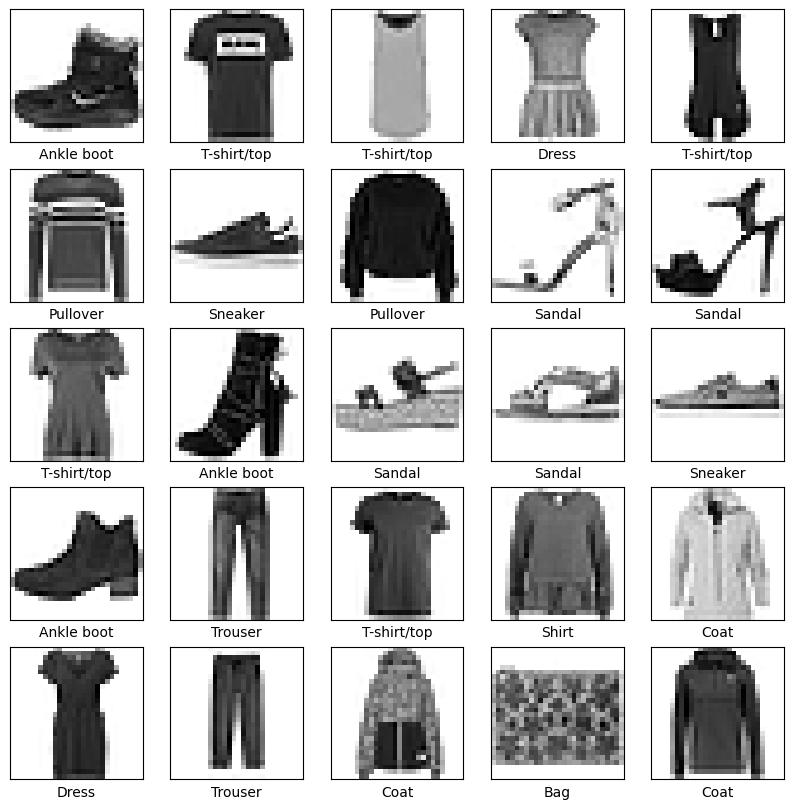

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[labels[i]])
plt.show()

In [ ]:
test_loss, test_acc = f_mnist_model.evaluate(images,  labels, verbose=2)
print('\nTest accuracy:', test_acc)

1875/1875 - 7s - loss: 0.1803 - accuracy: 0.9515 - 7s/epoch - 4ms/step

Test accuracy: 0.951533317565918


In [ ]:
predictions = f_mnist_model.predict(images)

1875/1875 [==============================] - 7s 4ms/step


In [ ]:
predictions[0]

array([6.8586412e-16, 3.6106745e-12, 4.0623836e-17, 2.3829728e-07,
       1.4490528e-15, 3.5642878e-09, 9.8338254e-13, 1.6078151e-07,
       6.5297755e-08, 9.9999946e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
labels[0]

9

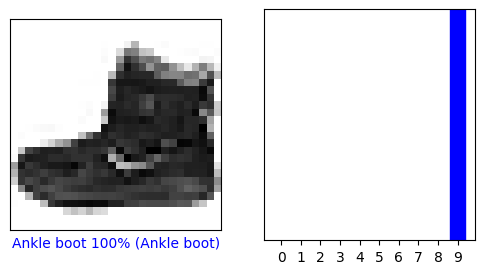

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], labels, images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], labels)
plt.show()

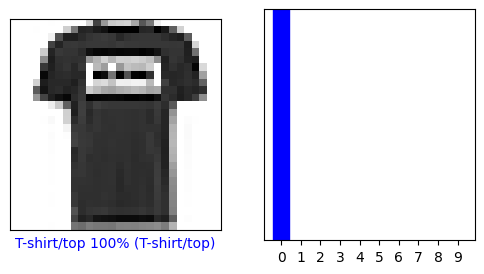

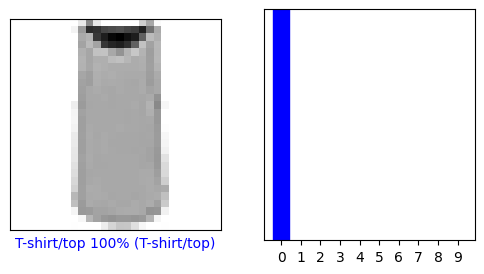

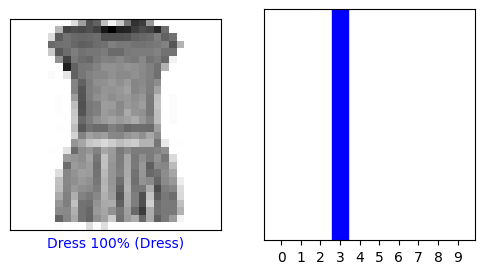

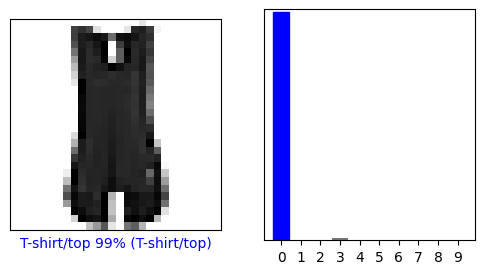

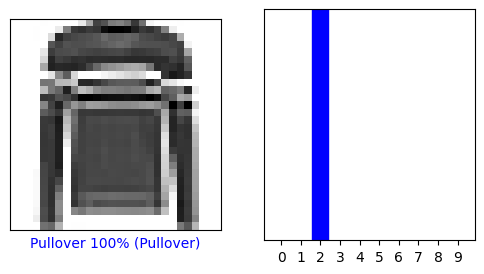

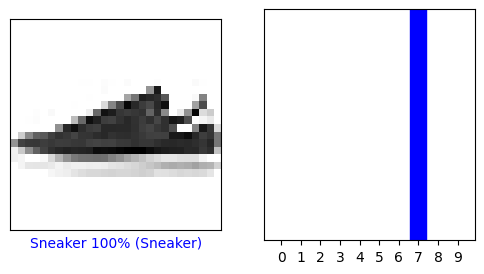

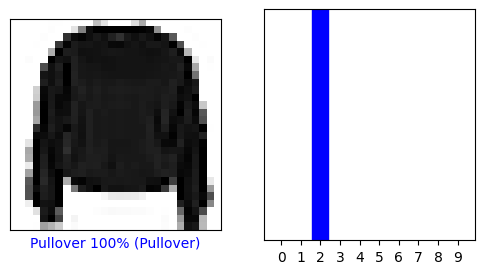

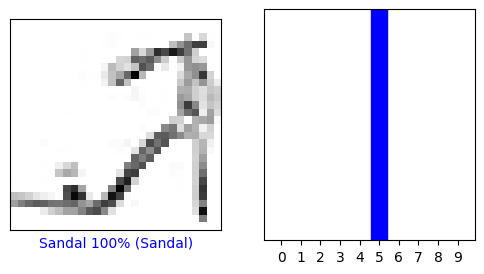

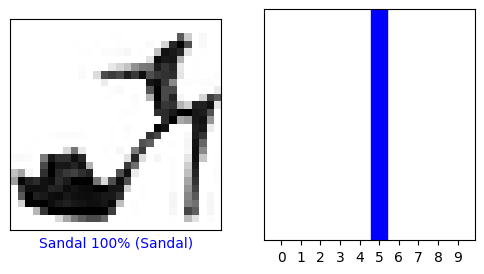

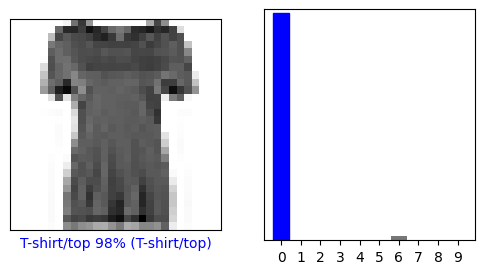

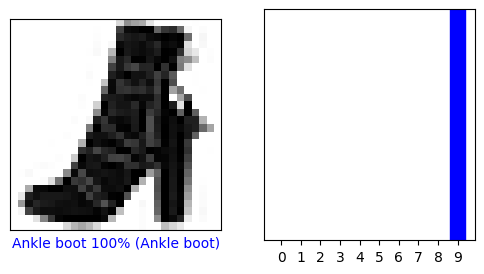

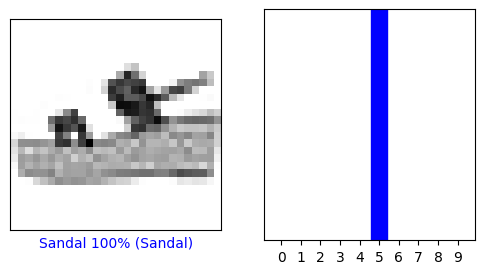

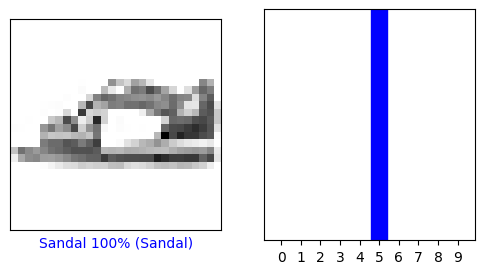

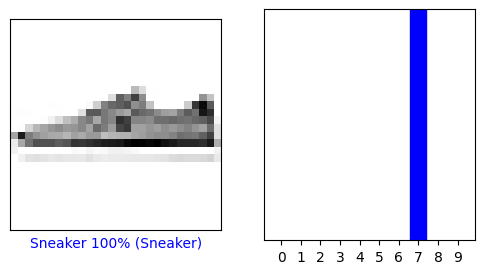

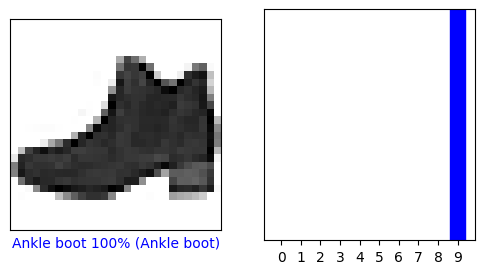

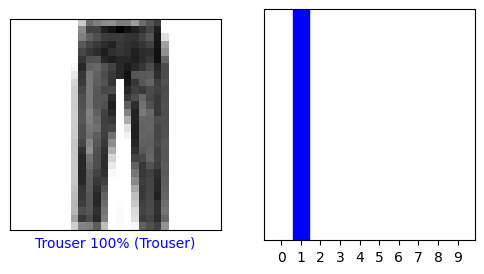

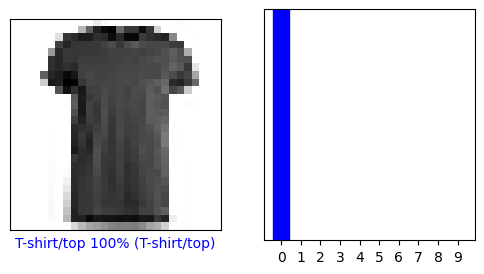

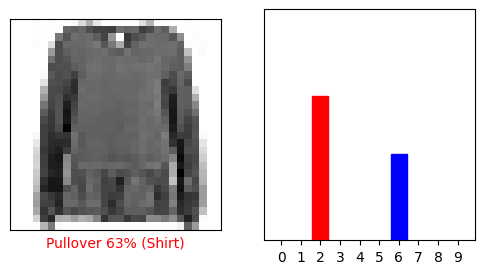

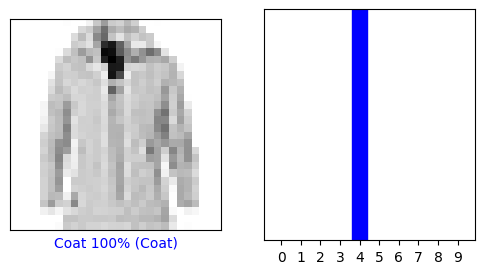

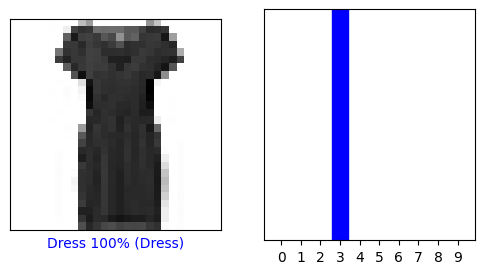

In [ ]:
for i in range(1,21):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], labels, images)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  labels)
  plt.show()